In [1]:
import cv2
import numpy as np
import glob
import os
# Import libraries for HOG (Feature extraction)
from skimage.io import imread
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import face_recognition

In [2]:
# Read the images and extract faces
# Store the extracted faces in a separate directory, with name same as that of original image appended with the face count

original_image_path = '/home/tushargarg18/anaconda/Face_Clustering/Data'

segregated_images_path = '/home/tushargarg18/anaconda/Face_Clustering/Segregated_images'

face_cascade = cv2.CascadeClassifier('/home/tushargarg18/anaconda3/lib/python3.10/site-packages/cv2/data/haarcascade_frontalface_default.xml')

for original_img in os.listdir(original_image_path):
    if original_img.endswith(".jpg") or original_img.endswith(".jpeg"):
        img = cv2.imread(original_image_path+'/'+original_img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.4, 7)
        face_count = 0
        for (x,y,w,h) in faces:
            face = img[y:y+h, x:x+w] #slice the face from the image
            #new_size = (450, 340)
            #resize_face = cv2.resize(face,new_size)
            cv2.imwrite('/home/tushargarg18/anaconda/Face_Clustering/extracted_photos/'+str(original_img[:len(original_img)-4])+' '+str(face_count)+'.jpg', face) #save the image
            face_count+=1

In [3]:
extracted_image_path = '/home/tushargarg18/anaconda/Face_Clustering/extracted_photos'
image_vector_pd = pd.DataFrame()
trans_img_vector_pd = pd.DataFrame()
target_height = 512

for extracted_img in os.listdir(extracted_image_path):
    if extracted_img.endswith(".jpg") or extracted_img.endswith(".jpeg"):
        img = cv2.imread(extracted_image_path+'/'+extracted_img)
        if img.shape[0] > 512:
            w = int(round(target_height * img.shape[1] / img.shape[0]))
            img = cv2.resize(img, (w, target_height))
        fd = face_recognition.face_encodings(img)
        #fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
        #image_vector_pd[str(extracted_img[:len(extracted_img)-4])] = np.array(fd)
        try:
            image_vector_pd[str(extracted_img[:len(extracted_img)-4])] = np.array(fd[0])
        except:
            continue

/tmp/ipykernel_22000/1151004523.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_vector_pd[str(extracted_img[:len(extracted_img)-4])] = np.array(fd[0])
/tmp/ipykernel_22000/1151004523.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_vector_pd[str(extracted_img[:len(extracted_img)-4])] = np.array(fd[0])
/tmp/ipykernel_22000/1151004523.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all col

/tmp/ipykernel_22000/1151004523.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_vector_pd[str(extracted_img[:len(extracted_img)-4])] = np.array(fd[0])
/tmp/ipykernel_22000/1151004523.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_vector_pd[str(extracted_img[:len(extracted_img)-4])] = np.array(fd[0])
/tmp/ipykernel_22000/1151004523.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all col

In [4]:
trans_img_vector_pd = image_vector_pd.transpose()

trans_img_vector_pd.corr()

trans_img_vector_pd.shape

(129, 128)

<Axes: >

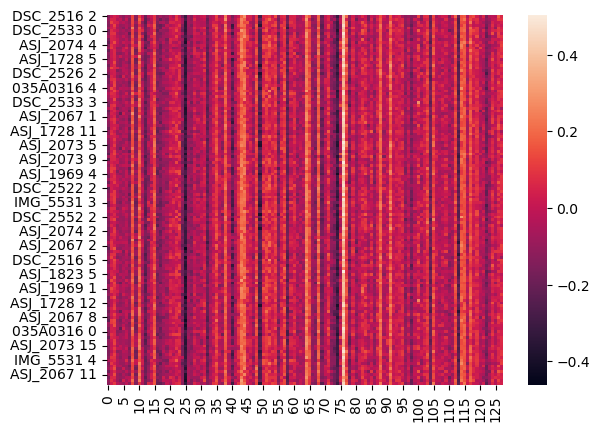

In [5]:
sns.heatmap(data = trans_img_vector_pd)

/home/tushargarg18/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tushargarg18/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tushargarg18/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tushargarg18/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

/home/tushargarg18/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tushargarg18/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tushargarg18/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tushargarg18/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

ValueError: x and y must have same first dimension, but have shapes (69,) and (49,)

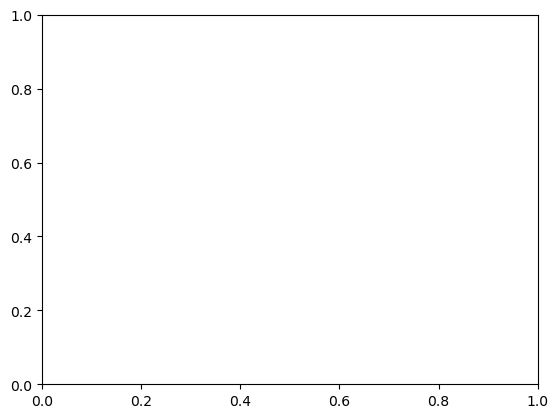

In [6]:
from sklearn.cluster import KMeans
cost = []
for i in range(1,50):
    kmeans = KMeans(n_clusters=35).fit(trans_img_vector_pd)
    cost.append(kmeans.inertia_)
    
plt.plot(range(1,70),cost)

In [10]:
kmeans = KMeans(n_clusters=53).fit(trans_img_vector_pd)
print(kmeans.labels_)
trans_img_vector_pd.head(10)

/home/tushargarg18/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[25 41 14 19 28 33  0  2 14 18  5 46 24 30 16 36 12 48 14 20 27 52 42 13
 12 44 15 26 43 12 23 47 37 22  4 20  0 36 25 22  3 50  2 13 48  9  4 13
 18  3 17  2 39  0  3 48 47 43 29  2 34  8  0 11 50 51 27 20  2 48 21 19
  7  3  9  8 47 16 30 35  5  6 32  3 37 15 47 36 11  2  3 12 49  8 45 14
 14 24 31 23 36  9 11 40  1 22  6 50 12  4 30  3 17 11 11 16  1 48  8 50
 26  5 13 12 29 12 10 38 19]


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
DSC_2516 2,-0.140448,-0.002774,0.046554,0.007343,-0.072485,-0.120110,-0.051738,-0.084049,0.123736,-0.126972,...,0.144017,0.034574,-0.057449,0.065960,-0.160051,-0.031877,-0.013339,-0.028771,0.173573,0.060235
ASJ_2073 14,-0.099025,0.056338,0.052734,-0.032995,-0.001581,-0.109406,0.003426,-0.132620,0.133292,-0.140223,...,0.059581,0.082784,-0.033276,0.005350,-0.124762,-0.079459,-0.002887,0.006779,0.121574,0.090329
ASJ_1823 0,-0.121054,0.115921,0.048663,0.038169,-0.046199,-0.011034,-0.060483,-0.114858,0.129691,-0.078030,...,-0.006744,0.067683,-0.008401,-0.061396,-0.141134,-0.111633,0.049859,-0.003963,0.009747,0.039710
ASJ_1966 2,-0.138105,0.016671,0.123474,-0.018627,-0.098362,-0.082511,-0.039606,-0.094580,0.109467,-0.138551,...,-0.010477,0.004190,-0.025319,0.005592,-0.172563,-0.075229,0.079590,-0.032346,0.040845,0.004143
ASJ_1966 1,-0.079548,0.030652,0.075309,-0.057683,-0.085709,-0.130983,-0.035806,-0.134957,0.240886,-0.111354,...,0.051782,0.098849,-0.045082,-0.068112,-0.218237,-0.047577,0.039274,-0.102886,0.108181,0.038134
DSC_2533 0,-0.169078,0.073628,0.025553,-0.004225,-0.077350,-0.046735,-0.100538,-0.086020,0.132393,-0.070556,...,0.126920,0.090168,-0.068515,0.057148,-0.140208,-0.031855,0.057468,0.050106,0.090026,0.059966
ASJ_1966 4,-0.126040,0.088368,0.094909,-0.050490,-0.096651,-0.083721,-0.045292,-0.208116,0.128051,-0.140084,...,0.076224,0.071271,-0.040394,-0.005271,-0.195148,-0.033678,0.146775,-0.051059,0.116577,0.023606
ASJ_1966 5,-0.067171,0.056261,0.042010,-0.026057,-0.066533,0.000047,-0.060776,-0.130661,0.156798,-0.114505,...,0.012011,0.139173,-0.084940,0.016205,-0.212827,-0.137618,-0.032966,-0.069093,0.104411,0.087664
ASJ_2067 0,-0.162242,0.053868,0.043817,0.009520,-0.062662,-0.082407,-0.019762,-0.117813,0.109606,-0.071465,...,0.009261,0.024268,-0.035781,-0.070227,-0.101844,-0.100524,0.027906,0.018446,0.005805,0.052518
ASJ_1823 2,-0.213626,0.044662,0.138376,0.005568,-0.072943,0.010707,-0.019554,-0.039383,0.142298,-0.094766,...,0.082636,0.016043,0.049455,-0.072433,-0.143681,-0.004513,0.043201,-0.067124,0.053185,0.097186


In [11]:
#Spot check few clusters

index_list = list(trans_img_vector_pd.index)
for j in range(53):
    try:
        os.mkdir(segregated_images_path+'/'+str(j))
    except:
        print('Directory: '+str(j)+' exists!')
    for i in range(len(kmeans.labels_)):
        if kmeans.labels_[i] == j:
            temp_img = cv2.imread(original_image_path+'/'+str(index_list[i].split(' ')[0])+'.jpg')
            temp_img2 = cv2.imread(extracted_image_path+'/'+str(index_list[i])+'.jpg')
            cv2.imwrite(segregated_images_path+'/'+str(j)+'/'+str(index_list[i].split(' ')[0])+'.jpg',temp_img)
            cv2.imwrite(segregated_images_path+'/'+str(j)+'/'+'Extracted'+str(index_list[i])+'.jpg',temp_img2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()